# Supply Side Metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
bid=pd.read_csv('all_bid.csv')
stock=pd.read_csv('all_stock.csv')

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])

In [4]:
buysell=pd.read_csv('buyer_seller.csv')

## Best Styles

In [5]:
bs21=buysell[buysell['year']==2021]
bs21.head()

,QuoteID or Invoice ID,buyer_id,seller_id,Auction Flag,quote_created_at,item_id,total,cost,status,buyer,seller,Net Revenue,Company Name,wk,month,year
75,6892,13795,196448.0,1,2/28/21,2358625,113.0,67.19,Complete,BumbleBeeNYC,aucnet,45.81,BumbleBeeNYC,202109,202102,2021
76,6892,13795,196448.0,1,2/28/21,2356627,421.0,335.97,Complete,BumbleBeeNYC,aucnet,85.03,BumbleBeeNYC,202109,202102,2021
77,6893,92958,196448.0,1,2/28/21,2359736,81.0,28.80,Complete,thrillofthefind,aucnet,52.20,thrillofthefind,202109,202102,2021
78,6894,200526,196448.0,1,2/28/21,2351808,168.0,115.19,Complete,smittenluxury,aucnet,52.81,smittenluxury,202109,202102,2021
79,6895,204950,196448.0,1,2/28/21,2359082,299.0,230.38,Complete,Rue Gilt,aucnet,68.62,Rue Gilt,202109,202102,2021


In [89]:
bs21.groupby('seller')['total'].mean().sort_values(ascending=False).reset_index()

,seller,total
0,LuxLexicon_WS,22984.600000
1,maruconsign,15000.000000
2,Gemma by WP Diamonds,11500.000000
3,LuxAddicts_WS,11406.000000
4,Opherty_Ciocci_WS,10500.000000
5,AnnsFabulousFindsWS,10498.333333
6,GinzaXiaoma_WS,9576.428571
7,OpulentHabits_WS,5071.200000
8,roundaboutcouture_WS,4662.000000
9,rebag,4041.250000


In [101]:
bid['title'].value_counts()[:20].rename('bid_count').reset_index().rename(columns={'index':'item_title'})

,item_title,bid_count
0,Neverfull MM,585
1,Pochette Accessoires,533
2,"Louis Vuitton Neverfull Mm, Monogram",310
3,Speedy 30,308
4,Louis Vuitton Neverfull Mm,304
5,Louis Vuitton Pochette Accessoires,299
6,Speedy 25,259
7,Alma,243
8,Neverfull PM,238
9,"Neverfull MM, Monogram",220


* Top 20 items bidded on from 2020-2021 by bid count

In [104]:
stock['title'].value_counts()[:20].rename('count').reset_index().rename(columns={'index':'item_title'})

,item_title,count
0,"Louis Vuitton Speedy 30, Monogram",123
1,"Louis Vuitton Speedy 35, Monogram",83
2,"Louis Vuitton Keepall 50, Monogram",77
3,"Louis Vuitton Keepall 45, Monogram",53
4,"Louis Vuitton Speedy 40, Monogram",46
5,"Louis Vuitton Keepall Bandouliere 55, Monogram",38
6,"Louis Vuitton Speedy 25, Epi",34
7,"Louis Vuitton Keepall 55, Monogram",32
8,"Louis Vuitton Keepall Bandouliere 50, Monogram",32
9,Louis Vuitton Leather Shoulder Strap Beige,31


* Top 20 items purchased in stock from 2020-2021 by count

In [9]:
stock.groupby(['seller','title'])['price'].count()

seller               title                                                                               
2ndChance_WS         Fendi Vintage Zucca Canvas Tote                                                         1
                     Prada vintage Dark Purple Nylon Zip Top Baguette Bag                                    1
AnnsFabulousFindsWS  Chanel Medium Rattan And Patent Leather Vanity Case                                     1
                     Hermes Birkin 35 Chevre Leather Ebene                                                   1
                     Hermès Tosca & Rose Tyrien Epsom Candy Birkin 35 Limited Edition                        1
                                                                                                            ..
yoogis_wholesale     Yves Saint Laurent Grey Crinkled Calfskin Leather Baby Niki Bag                         1
                     Yves Saint Laurent Grey Pebbled Calfskin Leather Small Sac de Jour                      1
      

In [10]:
auc_item=bid.groupby(['auction_name', 'title'])['bid'].count().reset_index()
auc_price=bid.groupby(['auction_name', 'title'])['bid'].mean().rename('avg_bid').reset_index()
auc_list=list(auc_item['auction_name'].unique())

auc_item=auc_item.merge(auc_price, how='left')

In [11]:
a_high=auc_item[auc_item['auction_name']=='Aucnet High'].sort_values(by='bid', ascending=False)[:10].reset_index(drop=True)
a_low=auc_item[auc_item['auction_name']=='Aucnet Low'].sort_values(by='bid', ascending=False)[:10].reset_index(drop=True)
eco=auc_item[auc_item['auction_name']=='EcoRing'].sort_values(by='bid', ascending=False)[:10].reset_index(drop=True)
val=auc_item[auc_item['auction_name']=='Val Bags & Jewelry'].sort_values(by='bid', ascending=False)[:10].reset_index(drop=True)

In [12]:
val.head()

,auction_name,title,bid,avg_bid
0,Val Bags & Jewelry,"Louis Vuitton Neverfull Mm, Monogram",69,778.956522
1,Val Bags & Jewelry,"Louis Vuitton Neverfull MM, Monogram",52,787.884615
2,Val Bags & Jewelry,"Neverfull MM, Monogram",41,901.341463
3,Val Bags & Jewelry,"Louis Vuitton Neverfull MM, Damier Ebene",31,836.483871
4,Val Bags & Jewelry,Goyard Saint Louis PM,26,954.038462


In [13]:
for a in [a_high, a_low, eco, val]:
    print(a.iloc[0])
    print('\n')

auction_name                   Aucnet High
title           Louis Vuitton Neverfull Mm
bid                                    142
avg_bid                            842.204
Name: 0, dtype: object


auction_name                            Aucnet Low
title           Louis Vuitton Pochette Accessoires
bid                                            171
avg_bid                                    410.497
Name: 0, dtype: object


auction_name                          EcoRing
title           Chanel Medallion Tote, Caviar
bid                                        26
avg_bid                               1209.88
Name: 0, dtype: object


auction_name                      Val Bags & Jewelry
title           Louis Vuitton Neverfull Mm, Monogram
bid                                               69
avg_bid                                      778.957
Name: 0, dtype: object




* Item with most bids by auction type
* Average bid for item
* Each df has top 10 items for each seller

## Average Sell Through

In [14]:
stock21=stock[stock['submitted_date'].dt.year==2021]

In [250]:
monthly=(stock21.groupby([stock21['seller'], stock21['submitted_date'].dt.month.rename('month')])['price']
 .sum()
 .rename('gmv')
 .reset_index())

In [251]:
top_5=list(monthly.groupby('seller')['gmv'].sum().sort_values(ascending=False)[:5].index)

* GMV per seller by month

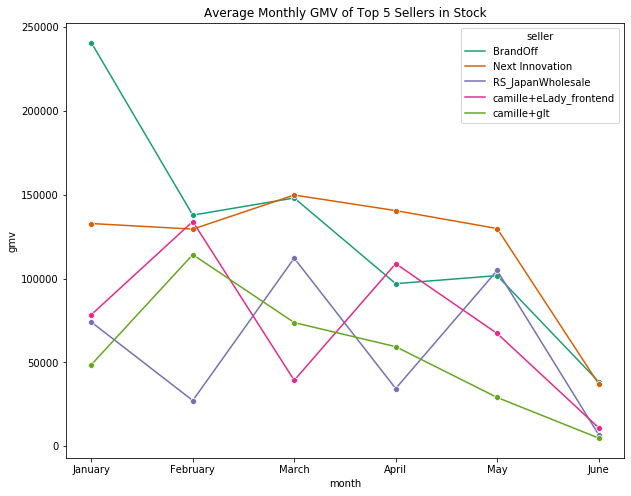

In [252]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x='month', y='gmv', data=monthly[monthly['seller'].isin(top_5)], hue='seller', marker='o',
               palette='Dark2')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.title('Average Monthly GMV of Top 5 Sellers in Stock')
plt.show()

In [18]:
bid21=bid[bid['bid_placed_on'].dt.year==2021]

In [253]:
per_auc=(bid21.groupby([bid21['auction_name'], bid21['auction_id'], bid21['bid_placed_on'].dt.month.rename('month')])['winning_price']
 .sum()
 .rename('gmv')
 .reset_index())

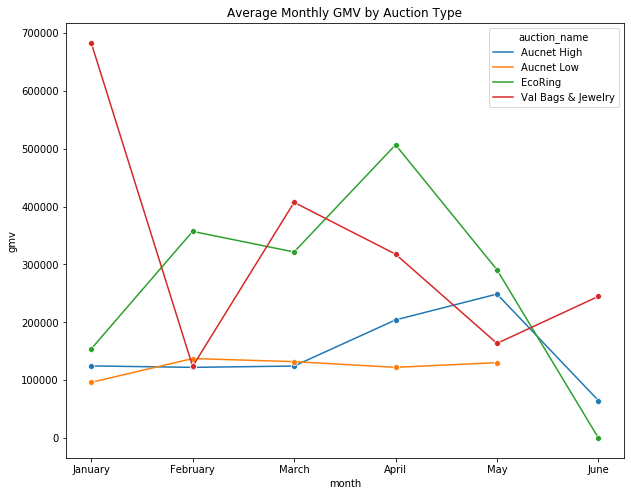

In [254]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x='month', y='gmv', data=per_auc, hue='auction_name', marker='o', ci=None)
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.title('Average Monthly GMV by Auction Type')
plt.show()

In [107]:
bid21[(bid21['auction_name']=='Val Bags & Jewelry')&(bid21['bid_placed_on'].dt.month==1)].sort_values(by='winning_price', ascending=False)

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
2226,254,200963.0,the realreal,2175162,Hermès,Handbags,Hermès Birkin 25 Togo Pearl grey Gold Metal fi...,A,16900,14219.89,20924.0,2021-01-15 15:15:00,15.0,4.0,1/15/21,Val Bags & Jewelry,NaN,N,N
2622,254,200963.0,the realreal,2173133,Hermès,Shoulder Bags,Hermès Kelly 28 Togo Veil Maki Silver Metal f...,S,14194,11524.87,16489.0,2021-01-17 00:06:00,0.0,6.0,1/17/21,Val Bags & Jewelry,NaN,N,N
2227,254,200963.0,the realreal,2172748,Hermès,Handbags,Hermès Birkin 25 Veau Swift Rose Ete Y:2020年,SA,16000,12955.68,16334.0,2021-01-15 15:17:00,15.0,4.0,1/15/21,Val Bags & Jewelry,NaN,N,Y
2969,254,200963.0,the realreal,2173152,Hermès,Handbags,Hermès Birkin 30 Togo Black Silver Metal fitti...,AB,10000,8379.05,15789.0,2021-01-19 09:15:00,9.0,1.0,1/19/21,Val Bags & Jewelry,NaN,N,N
2237,254,200963.0,the realreal,2171119,Hermès,Handbags,Hermès Birkin 30 Veau Epsom Black Silver Metal...,A,12500,10633.06,15789.0,2021-01-15 15:28:00,15.0,4.0,1/15/21,Val Bags & Jewelry,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,262,92958.0,thrill of the find,2230335,Louis Vuitton,Totes,"Louis Vuitton Cabas Piano, Monogram",BC,333,195.52,NaN,2021-01-29 15:42:00,15.0,4.0,1/29/21,Val Bags & Jewelry,NaN,N,N
6263,262,92958.0,thrill of the find,2229570,Louis Vuitton,Shoulder Bags,Louis Vuitton Damier Geant Messenger M93225 VI...,BC,233,136.87,NaN,2021-01-29 15:50:00,15.0,4.0,1/29/21,Val Bags & Jewelry,NaN,N,N
6318,262,127817.0,bagriculture,2230743,Hermès,Handbags,Hermès Birkin 35 Ardennes Black Gold Metal fit...,B,6102,3470.52,NaN,2021-01-30 20:32:00,20.0,5.0,1/30/21,Val Bags & Jewelry,NaN,N,N
6358,262,127817.0,bagriculture,2230574,Christian Dior,Handbags,Christian Dior Trotter Saddle Canvas & leather...,B,901,586.57,NaN,2021-01-31 11:19:00,11.0,6.0,1/31/21,Val Bags & Jewelry,NaN,N,N


In [21]:
# bid21.groupby('auction_id')['auction_name'].value_counts()[:50]

In [260]:
sell=pd.read_excel('update_supply.xlsx')

In [263]:
sell['apr_sellthru']=sell['apr_sold']/sell['apr_listed']
sell['may_sellthru']=sell['may_sold']/sell['may_listed']
sell.head()

,Seller ID,Supplier,apr_listed,apr_sold,may_listed,may_sold,apr_sellthru,may_sellthru
0,204684,eLady,1568,192,5214,153,0.122449,0.029344
1,202899,BrandOff,1300,126,1696,105,0.096923,0.061910
2,213070,bagriculture,929,56,1352,15,0.060280,0.011095
3,198548,Next Innovation,2629,348,2487,340,0.132370,0.136711
4,196448,aucnet,65193,824,51861,1067,0.012639,0.020574


In [268]:
# sell.to_excel('sellthru_apr_may.xlsx')

In [269]:
sell.sort_values(by='may_sellthru', ascending=False)

,Seller ID,Supplier,apr_listed,apr_sold,may_listed,may_sold,apr_sellthru,may_sellthru
19,207059,DallasDesigner_wholesale,1,1,12,12,1.000000,1.000000
47,216964,AnnsFabulousFindsWS,0,0,2,1,NaN,0.500000
54,218337,Icone-WS,12,4,6,2,0.333333,0.333333
13,207025,huntstreetwholesale,0,0,75,17,NaN,0.226667
58,218877,stylestainWS,0,0,144,31,NaN,0.215278
24,210205,BrandJFA_WS,26,44,40,8,1.692308,0.200000
34,215421,RS_JapanWholesale,2344,16,379,59,0.006826,0.155673
3,198548,Next Innovation,2629,348,2487,340,0.132370,0.136711
18,209430,yoogis_wholesale,35,0,329,43,0.000000,0.130699
9,202972,dct-ep,486,46,507,52,0.094650,0.102564


In [274]:
auc_key=pd.read_excel('AuctionSellers.xlsx')
auc_key.head()

,auction_id,username
0,1,aucnet
1,2,aucnet
2,3,aucnet
3,4,aucnet
4,5,aucnet


In [275]:
bid21=bid21.merge(auc_key, how='left')
bid21.head()

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10,username
0,250,182137.0,karen's rocks and rags,2131275,Louis Vuitton,Clutches,Louis Vuitton Trousse Toilette,C,99,9.84,137.0,2021-01-01 12:11:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N,aucnet
1,250,182137.0,karen's rocks and rags,2138374,Christian Dior,Clutches,Christian Dior Bag / pouch pink,C,49,14.77,47.0,2021-01-01 12:13:00,12.0,4.0,1/1/21,Aucnet Low,NaN,Y,Y,aucnet
2,250,182137.0,karen's rocks and rags,2131983,Louis Vuitton,Clutches,Louis Vuitton Etui Troyes Balldu Golf Pouch,C,47,14.77,NaN,2021-01-01 12:15:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N,aucnet
3,250,182137.0,karen's rocks and rags,2135036,Christian Dior,Bracelets,Christian Dior Bangle Bracelet metal,B,99,14.77,NaN,2021-01-01 12:16:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N,aucnet
4,250,182137.0,karen's rocks and rags,2133153,Louis Vuitton,Shoulder Bags,Louis Vuitton Minima Amazone,C,147,9.84,239.0,2021-01-01 12:17:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N,aucnet


In [277]:
bid_apr=bid21[(bid21['bid_placed_on']>datetime.datetime(2021,4,1))&(bid21['bid_placed_on']<datetime.datetime(2021,5,1))]
bid_apr.groupby('username')['bid'].count()

username
aucnet             3455
camille+SOU        1133
camille+ecoring    3482
Name: bid, dtype: int64

ALL BIDS

In [280]:
bid_apr.groupby('username')['bid'].count()-(bid_apr[bid_apr['winning_price'].isnull()].groupby('username')['bid'].count())

username
aucnet             2329
camille+SOU        1081
camille+ecoring    2843
Name: bid, dtype: int64

WON BIDS

In [278]:
bid_may=bid21[(bid21['bid_placed_on']>datetime.datetime(2021,5,1))&(bid21['bid_placed_on']<datetime.datetime(2021,6,1))]
bid_may.groupby('username')['bid'].count()

username
aucnet             4773
camille+SOU         589
camille+ecoring    2290
Name: bid, dtype: int64

ALL BIDS

In [281]:
bid_may.groupby('username')['bid'].count()-(bid_may[bid_may['winning_price'].isnull()].groupby('username')['bid'].count())

username
aucnet             2587
camille+SOU         572
camille+ecoring    1600
Name: bid, dtype: int64

WON BIDS

## Types of Bags

In [24]:
louis_b=bid21[bid21['brand_name']=='Louis Vuitton']

louis_b.groupby('title')['bid'].count().sort_values(ascending=False)[:10]

title
Louis Vuitton Neverfull Mm                      248
Louis Vuitton Pochette Accessoires              240
Louis Vuitton Neverfull Mm, Monogram            184
Louis Vuitton Speedy 30                         127
Louis Vuitton Neverfull MM, Monogram            123
Louis Vuitton Zippy Wallet                      121
Louis Vuitton Neverfull Pm                       99
Louis Vuitton Pochette Accessoires, Monogram     94
Louis Vuitton Pochette Cles                      84
Louis Vuitton Neverfull Mm, Damier Ebene         77
Name: bid, dtype: int64

* Top 10 Louis Vuitton styles by number of bids

In [26]:
chanel_b=bid21[bid21['brand_name']=='Chanel']
chanel_b.groupby('title')['bid'].count().sort_values(ascending=False)[:10]

title
Chanel Earrings                                    137
Chanel CC Rhinestone Necklace                       80
Chanel Necklace                                     74
Chanel Quilted bag  Shoulder Bag                    74
Chanel Medallion Tote, Caviar                       66
Chanel CC Earrings                                  57
Chanel Sunglasses                                   50
Chanel Brooch                                       48
Chanel Other Lines Precious Metals And Earrings     47
Chanel Quilted Shoulder Bag                         44
Name: bid, dtype: int64

* Top 10 Chanel styles by number of bids

In [227]:
hermes_b=bid21[(bid21['brand_name']=='Hermès')&(bid21['category_name']=='Clutches')]
hermes_b.groupby('title')['bid'].count().sort_values(ascending=False)[:20]

title
Hermès Other Line Bag / Second                                              3
Hermès Hermes Jije Pouch                                                    3
Hermès Vespa Pouch                                                          2
Hermès Pochette Rio                                                         2
Hermès Jige Pm                                                              2
Hermes HERMES KELLY CLASSIC WALLET clutch bag                               2
Hermès Hermes Kelly Classic Wallet Clutch Bag                               2
Hermès Bolide bag Pouch                                                     2
Hermès Clutch Taurillon Clemence Saffron A Engraved                         1
Hermes accessories pouch                                                    1
Hermes handbag handbag                                                      1
Hermès Bolide Pouch Vaux Epsom White                                        1
Jige clutch bag                                           

* Top 10 Hermès styles by number of bids

In [30]:
items=list(bid21.item_id)

In [31]:
def multi_bid(list, bid):
    """
    Returns list of items with multiple bids
    
    Parameter list: the list of item ids
    Precondition: list is a non-empty list
    
    Parameter bid: the dataframe to search
    Precondition: bid is a dataframe with bid history
    """
    items=[]
    for i in list:
        count=bid[bid['item_id']==i].count()[0]
        if count>1:
            items.append(i)
    return items

multi_list=multi_bid(items,bid21)

In [35]:
print('the percent of items with multiple bids: {:.2f}%'.format(len(multi_list)/len(bid21)*100))

the percent of items with multiple bids: 32.39%


In [42]:
multi=bid21[bid21['item_id'].isin(multi_list)]
multi.head()

,auction_id,user_id,buyer,item_id,brand_name,category_name,title,overall_grade,bid,min_bid,winning_price,bid_placed_on,hour,day,date,auction_name,buyer_id,win,within_10
2,250,182137.0,karen's rocks and rags,2135793,Chanel,Clutches,Chanel Patent bag pouch black,C,79,14.77,250.0,2021-01-01 12:14:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N
38,250,182137.0,karen's rocks and rags,2138969,Louis Vuitton,Shoulder Bags,Louis Vuitton BumBag Bosphore,B,259,93.51,NaN,2021-01-01 12:57:00,12.0,4.0,1/1/21,Aucnet Low,NaN,N,N
55,250,186121.0,pemberley designer consignment,2138530,Louis Vuitton,Wallets,Louis Vuitton Zippy wallet,A,488,191.95,NaN,2021-01-01 21:17:00,21.0,4.0,1/1/21,Aucnet Low,NaN,N,N
61,250,186121.0,pemberley designer consignment,2137285,Louis Vuitton,Wallets,Louis Vuitton Pochette Cles,B,98,0.00,NaN,2021-01-01 21:32:00,21.0,4.0,1/1/21,Aucnet Low,NaN,N,N
66,250,186121.0,pemberley designer consignment,2134823,Louis Vuitton,Wallets,Louis Vuitton Zippy wallet,A,286,0.00,NaN,2021-01-01 21:45:00,21.0,4.0,1/1/21,Aucnet Low,NaN,N,N


In [108]:
multi.groupby(['item_id', 'title'])['bid'].count().sort_values(ascending=False)[:15].reset_index()

,item_id,title,bid
0,2416951,Chanel Chain Clutch Lambskin Black No 26 Box W...,21
1,2278090,"Louis Vuitton Neverfull MM, Monogram",16
2,2490219,"Louis Vuitton Neverfull Pm, Monogram",13
3,2188140,M40996 Neverfull MM Fuchsia,12
4,2629128,"Louis Vuitton Neverfull Mm, Monogram",11
5,2173346,"Louis Vuitton Neverfull MM, Giant Monogram",10
6,2610816,Louis Vuitton Damier Azur Neverfull Mm N41361 ...,10
7,2172660,"Neverfull MM, Monogram",10
8,2609961,Louis Vuitton Monogram Neverfull Mm M40156 Sp4057,9
9,2615232,"Louis Vuitton Neverfull Mm With Pouch, Damier ...",9


32% of items have multiple bids on them, but only 8 items have 10 or more bids. These items are often neverfulls and the classic Chanel black lambskin clutch.

In [48]:
multi['winning_price'].mean()

1006.2021123014969

In [49]:
bid21['winning_price'].mean()

862.8072111846947

In [114]:
bid21[bid21['item_id'].isin(multi_list)]['item_id'].index

Int64Index([], dtype='int64')

In [120]:
single=bid21.drop(bid21[bid21['item_id'].isin(multi_list)]['item_id'].index)
single['winning_price'].mean()

786.9878269253948

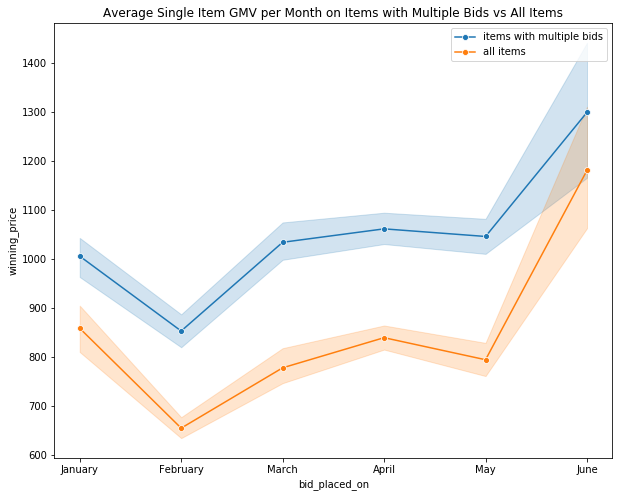

In [245]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x=multi['bid_placed_on'].dt.month, y=multi['winning_price'], label='items with multiple bids', marker='o')
sns.lineplot(x=bid21['bid_placed_on'].dt.month, y=bid21['winning_price'], label='all items', marker='o')
plt.title('Average Single Item GMV per Month on Items with Multiple Bids vs All Items')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.legend()
plt.show()

From this graph you can see that items with multiple bids tend to have higher average sellthroughs.

## New Suppliers

In [63]:
new_supp=['Icone-WS', 'CollectorSquare_WS','luxegetup_WS','galleryrare','stylestainWS','Opherty_Ciocci_WS']

In [83]:
grp_sum=list(stock21[stock21['seller']=='luxegetup_WS'].groupby('submitted_date')['price'].sum())

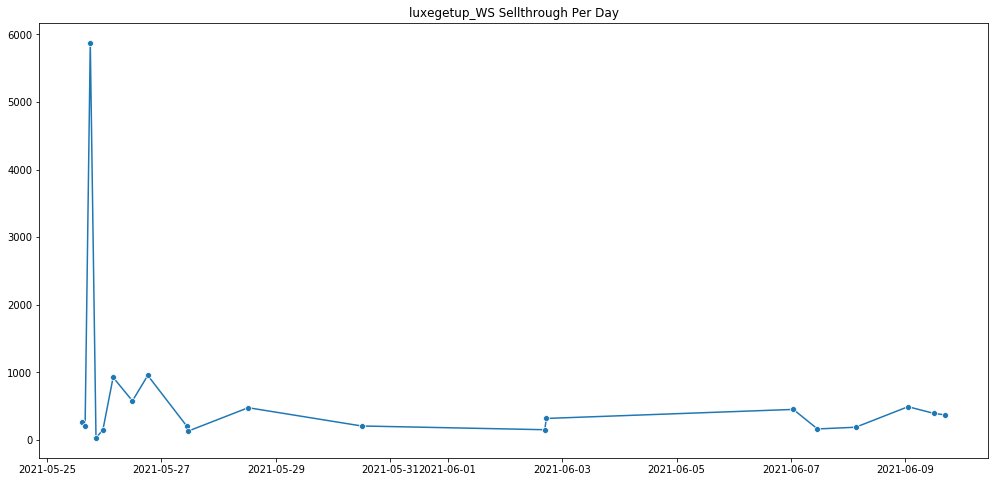

In [87]:
plt.figure(figsize=(17,8))
ax=sns.lineplot(x=stock21[stock21['seller']=='luxegetup_WS']['submitted_date'].unique(),
                y=grp_sum, marker='o',
               ci=None)
plt.title('luxegetup_WS Sellthrough Per Day')
plt.show()

## Change Overtime

In [143]:
bid30=bid21.loc[bid21['bid_placed_on']>datetime.datetime(2021,5,7)]
bid30['title'].value_counts()[:20]

Louis Vuitton Pochette Accessoires                 41
Chanel Earrings                                    38
Chanel Quilted bag  Shoulder Bag                   36
Hermès Other Line Accessories / Scarves            34
Louis Vuitton Zippy Wallet                         28
Louis Vuitton Batignolles Horizontal               25
Louis Vuitton Neverfull Pm                         25
Chanel Necklace                                    22
Louis Vuitton Speedy 30                            22
Louis Vuitton Neverfull Mm                         21
Louis Vuitton Pochette Accessoires, Monogram       20
Louis Vuitton Looping Gm                           20
Christian Dior Trotteur bag  Boston Bag            19
Gucci Gg Canvas (bag) / Shoulder Bag               18
Chanel Other Lines Precious Metals And Earrings    17
Louis Vuitton Alma                                 15
Louis Vuitton Keepall 55, Monogram                 14
Gucci Gg Canvas (bag) / Handbag                    14
Louis Vuitton Keepall 50, Mo

In [197]:
bid30[bid30['brand_name']!='Louis Vuitton']['title'].value_counts()[:20]

Chanel Earrings                                    38
Chanel Quilted bag  Shoulder Bag                   36
Hermès Other Line Accessories / Scarves            34
Chanel Necklace                                    22
Christian Dior Trotteur bag  Boston Bag            19
Gucci Gg Canvas (bag) / Shoulder Bag               18
Chanel Other Lines Precious Metals And Earrings    17
Chanel Bangle                                      14
Gucci Gg Canvas (bag) / Handbag                    14
Celine Bag / Shoulder                              11
Chanel Brooch                                      10
Chanel Quilted bag  Handbag                         9
Chanel Other Line Accessories / Belts               9
Chanel Other Line Bags / Tote                       9
Fendi Zucca (bag) / Shoulder Bag                    9
Chanel Bracelet                                     9
Chanel CC Earrings                                  9
Chanel Sunglasses                                   9
Hermes Carre 90 scarf       

* Top items NOT LV in the past 30 days

In [141]:
bid60=bid21.loc[bid21['bid_placed_on']>datetime.datetime(2021,4,7)]
bid60['title'].value_counts()[:20]

Louis Vuitton Pochette Accessoires                122
Louis Vuitton Speedy 30                            59
Louis Vuitton Zippy Wallet                         57
Chanel Earrings                                    55
Chanel Quilted bag  Shoulder Bag                   54
Louis Vuitton Neverfull Mm                         48
Louis Vuitton Looping Gm                           44
Hermès Other Line Accessories / Scarves            43
Louis Vuitton Pochette Accessoires, Monogram       38
Louis Vuitton Keepall 50, Monogram                 33
Louis Vuitton Neverfull Pm                         33
Louis Vuitton Keepall 55, Monogram                 32
Louis Vuitton Batignolles Horizontal               31
Louis Vuitton Speedy 25                            29
Gucci Gg Canvas (bag) / Shoulder Bag               28
Louis Vuitton Portefeuille Sarah                   28
Chanel Necklace                                    27
Louis Vuitton Alma                                 26
Christian Dior Trotteur bag 

In [144]:
bid90=bid21.loc[bid21['bid_placed_on']>datetime.datetime(2021,3,7)]
bid90['title'].value_counts()[:20]

Louis Vuitton Pochette Accessoires                 136
Chanel Earrings                                     72
Louis Vuitton Speedy 30                             69
Louis Vuitton Neverfull Mm                          68
Louis Vuitton Zippy Wallet                          66
Chanel Quilted bag  Shoulder Bag                    65
Louis Vuitton Looping Gm                            51
Louis Vuitton Keepall 55, Monogram                  49
Hermès Other Line Accessories / Scarves             49
Louis Vuitton Keepall 50, Monogram                  46
Louis Vuitton Neverfull Pm                          46
Louis Vuitton Pochette Accessoires, Monogram        43
Louis Vuitton Speedy 25                             41
Christian Dior Trotteur bag  Boston Bag             36
Chanel Necklace                                     35
Louis Vuitton Batignolles Horizontal                35
Chanel Other Lines Precious Metals And Earrings     34
Gucci Gg Canvas (bag) / Shoulder Bag                32
Louis Vuit

In [146]:
bid21['title'].value_counts()[:20]

Louis Vuitton Pochette Accessoires              179
Chanel Earrings                                 100
Louis Vuitton Neverfull Mm                       87
Louis Vuitton Speedy 30                          84
Louis Vuitton Zippy Wallet                       79
Chanel Quilted bag  Shoulder Bag                 72
Louis Vuitton Looping Gm                         61
Louis Vuitton Neverfull Pm                       55
Louis Vuitton Keepall 50, Monogram               53
Louis Vuitton Keepall 55, Monogram               53
Louis Vuitton Pochette Accessoires, Monogram     52
Louis Vuitton Keepall 50                         52
Hermès Other Line Accessories / Scarves          51
Louis Vuitton Speedy 25                          50
Chanel Necklace                                  48
Chanel CC Rhinestone Necklace                    47
Chanel CC Earrings                               47
Louis Vuitton Trotteur                           45
Louis Vuitton Portefeuille Sarah                 45
Louis Vuitto

In [148]:
bid['title'].value_counts()[:20]

Neverfull MM                                585
Pochette Accessoires                        533
Louis Vuitton Neverfull Mm, Monogram        310
Speedy 30                                   308
Louis Vuitton Neverfull Mm                  304
Louis Vuitton Pochette Accessoires          299
Speedy 25                                   259
Alma                                        243
Neverfull PM                                238
Neverfull MM, Monogram                      220
Neverfull MM, Damier Ebene                  211
Zippy wallet                                208
Louis Vuitton Neverfull MM                  203
Louis Vuitton Speedy 30, Monogram           199
Louis Vuitton Neverfull Mm, Damier Ebene    168
Chanel Earrings                             148
Louis Vuitton Neverfull MM, Monogram        145
Chanel Medallion Tote, Caviar               138
Louis Vuitton Neverfull Pm                  133
Mini pochette Accessoires                   131
Name: title, dtype: int64

In [191]:
pochette=bid21.dropna(subset=['title'])
pochette=pochette[pochette['title'].str.contains('Pochette')]
bid_count=list(pochette.groupby(pochette['bid_placed_on'].dt.month)['bid'].count())

In [243]:
pochette['winning_price'].mean()

595.7645764576457

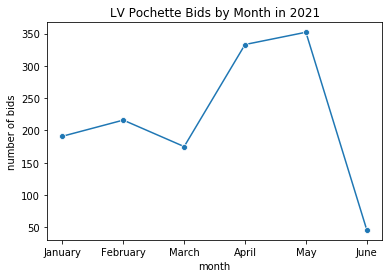

In [192]:
ax=sns.lineplot(x=pochette['bid_placed_on'].dt.month.unique(), y=bid_count, marker='o')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.title('LV Pochette Bids by Month in 2021')
plt.ylabel('number of bids')
plt.xlabel('month')
plt.show()

In [193]:
neverfull=bid21.dropna(subset=['title'])
neverfull=neverfull[neverfull['title'].str.contains('Neverfull')]
nev_bid_count=list(neverfull.groupby(neverfull['bid_placed_on'].dt.month)['bid'].count())

In [242]:
neverfull['winning_price'].mean()

906.0894819466248

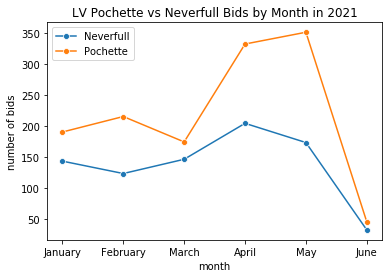

In [194]:
ax=sns.lineplot(x=neverfull['bid_placed_on'].dt.month.unique(), y=nev_bid_count, marker='o', label='Neverfull')
ax2=sns.lineplot(x=pochette['bid_placed_on'].dt.month.unique(), y=bid_count, marker='o', label='Pochette')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])

plt.title('LV Pochette vs Neverfull Bids by Month in 2021')
plt.ylabel('number of bids')
plt.xlabel('month')
plt.show()

In [209]:
gucci=bid21[bid21['brand_name']=='Gucci']
guc_bid_count=list(gucci.groupby(gucci['bid_placed_on'].dt.month)['bid'].count())

chanel=bid21[bid21['brand_name']=='Chanel']
cha_bid_count=list(chanel.groupby(chanel['bid_placed_on'].dt.month)['bid'].count())

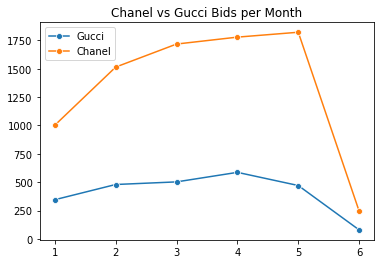

In [211]:
sns.lineplot(x=gucci['bid_placed_on'].dt.month.unique(), y=guc_bid_count, marker='o', label='Gucci')
sns.lineplot(x=chanel['bid_placed_on'].dt.month.unique(), y=cha_bid_count, marker='o', label='Chanel')
plt.title('Chanel vs Gucci Bids per Month')
plt.show()

In [219]:
baguette=bid21.dropna(subset=['title'])
baguette=baguette[baguette['title'].str.contains('Baguette')]
bag_bid_count=list(baguette.groupby(baguette['bid_placed_on'].dt.month)['bid'].count())

In [244]:
baguette['winning_price'].mean()

753.7619047619048

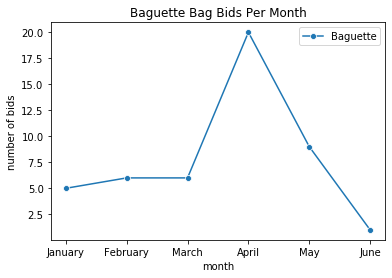

In [223]:
ax=sns.lineplot(x=baguette['bid_placed_on'].dt.month.unique(), y=bag_bid_count, marker='o', label='Baguette')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.title('Baguette Bag Bids Per Month')
plt.ylabel('number of bids')

plt.xlabel('month')
plt.show()

* Trending downward since April

In [235]:
speedy=stock21.dropna(subset=['title'])
speedy=speedy[speedy['title'].str.contains('Speedy')]
speedy_bid_count=list(speedy.groupby(speedy['submitted_date'].dt.month)['price'].count())

In [238]:
keepall=stock21.dropna(subset=['title'])
keepall=keepall[keepall['title'].str.contains('Keepall')]
keep_bid_count=list(keepall.groupby(keepall['submitted_date'].dt.month)['price'].count())

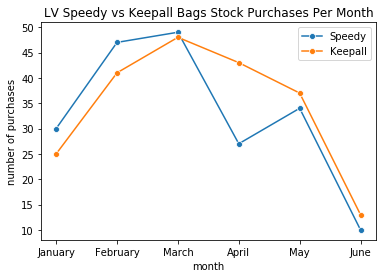

In [239]:
ax=sns.lineplot(x=speedy['submitted_date'].dt.month.unique(), y=speedy_bid_count, marker='o', label='Speedy')
ax2=sns.lineplot(x=keepall['submitted_date'].dt.month.unique(), y=keep_bid_count, marker='o', label='Keepall')
ax.set_xticklabels(['x', 'January', 'February', 'March', 'April', 'May', 'June'])
plt.title('LV Speedy vs Keepall Bags Stock Purchases Per Month')
plt.ylabel('number of purchases')
plt.xlabel('month')
plt.show()

In [240]:
keepall['price'].mean()

591.0483091787439

In [241]:
speedy['price'].mean()

541.8121827411168